**Convolutional layer**

Import the image

In [0]:
#import libraries

import cv2 #OpenCV library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
image = files.upload()

Saving dog.5.jpg to dog.5.jpg


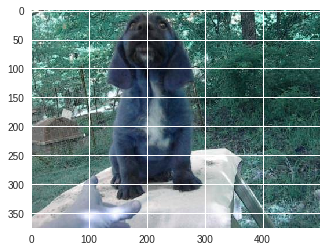

In [3]:
#load color image
img = cv2.imread("dog.5.jpg")

plt.imshow(img)
plt.show()

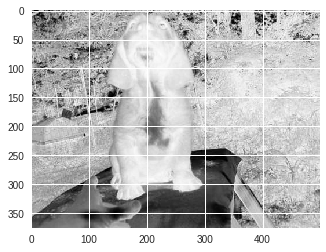

array([[100, 112, 137, ...,  55,  62,  70],
       [ 90, 101, 131, ...,  66,  63,  59],
       [150, 135, 140, ...,  93,  80,  63],
       ...,
       [189, 189, 189, ..., 114, 128, 140],
       [187, 187, 187, ..., 109, 126, 143],
       [185, 185, 185, ...,  91, 107, 123]], dtype=uint8)

In [4]:
#Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.show()
gray_img

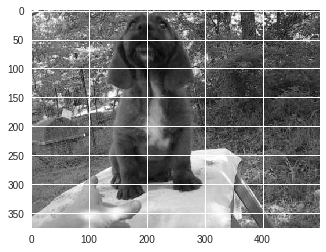

In [5]:
#normalize, rescale entries to lie in [0, 1]
gray_img = gray_img.astype("float32")/255

#plot image
plt.imshow(gray_img, cmap="gray")
plt.show()

Define and visualize the filter

In [6]:
import numpy as np

filter_vals = np.array([[-1, -1, 1, 1],
                       [-1, -1, 1, 1],
                       [-1, -1, 1, 1],
                       [-1, -1, 1, 1]])
print("Fliter shape : ",filter_vals.shape)

Fliter shape :  (4, 4)


In [7]:
#Defining four different filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_vals.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])
#for example printing the values of filter 4
print("Filter 4: \n",filter_4)

Filter 4: 
 [[ 1  1  1  1]
 [ 1  1  1  1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]]


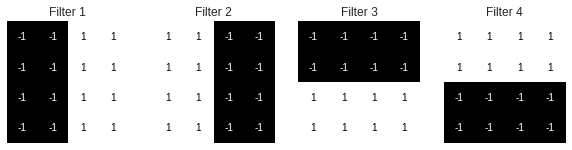

In [8]:
#visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap="gray")
  ax.set_title('Filter %s'% str(i+1))
  width, height = filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]), xy = (y,x),
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white' if filters[i][x][y]<0 else 'black')

Defining a convolutional layer

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
#define a single layer convolutional layer with four layers

class Net(nn.Module):
  
  def __init__(self, weight):
    super(Net, self).__init__()
    # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
    
    k_height, k_width = weight.shape[2:]
    #assume there are 4 grayscale filters
    self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
    
  def forward(self, x):
    #calc the oputput of a convolutional layer
    #pre- and post- activation
    conv_x = self.conv(x)
    activated_x = F.relu(conv_x)
    
    #returns both layers
    return conv_x, activated_x
  
#instataniate the model and set the weigths
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

#print out the layer in network
print(model)    

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


Visulaize the output of each filter

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filter = 4):
  fig = plt.figure(figsize=(20, 20))
  
  for i in range(n_filter):
    ax = fig.add_subplot(1, n_filter, i+1, xticks=[], yticks=[])
    #grab layer outputs
    ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap="gray")
    ax.set_title('Output %s' %str(i+1))

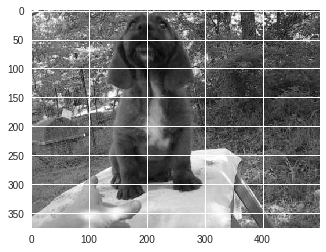

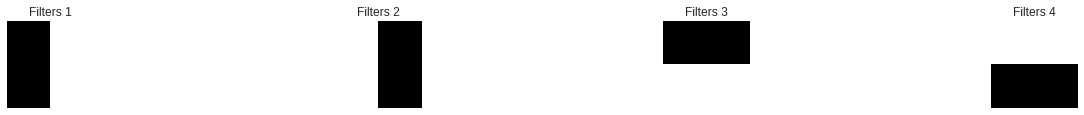

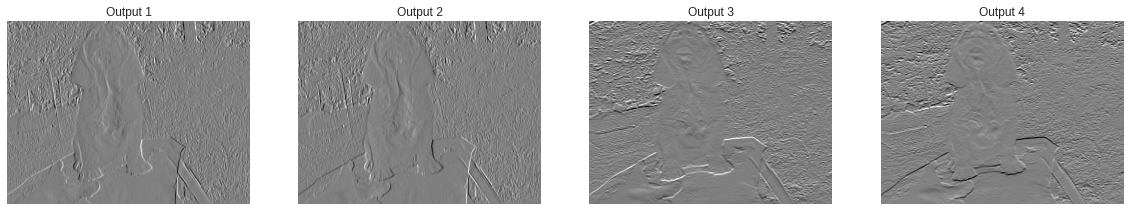

In [12]:
# plot original image
plt.imshow(gray_img, cmap="gray")

# Visualize all filters
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
  ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
  ax.imshow(filters[i], cmap="gray")
  ax.set_title('Filters %s' %str(i+1))
  
  
# Convert the image into an input tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)


RELU activation

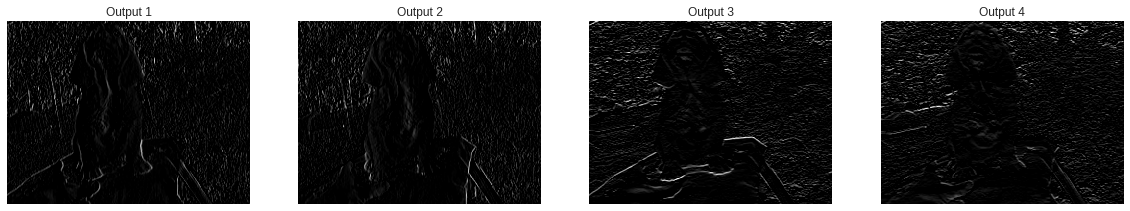

In [13]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

for more details visit this link

https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/conv-visualization/conv_visualization.ipynb